In [1]:
import pandas as pd
import altair as alt

alt.themes.enable('opaque')

ThemeRegistry.enable('opaque')

In [2]:
position = 'WR'
week = '1'
PATH = 'data/week' + week + '/' + position + '/'

In [57]:
df = pd.read_csv(PATH + position + '.csv')
df.head()

,Player,Team,Games,Targets,Receptions,ReceivingYards,ReceivingTD,Attempts,RushingYards,RushingTD,FantasyPoints,FantasyPointsPerGame
0,Jamison Crowder,NYJ,1,17,14,99,0,1,4,0,17.3,17.3
1,Danny Amendola,DET,1,13,7,104,1,0,0,0,19.9,19.9
2,Larry Fitzgerald,ARI,1,13,8,113,1,0,0,0,21.3,21.3
3,DeAndre Hopkins,HOU,1,13,8,111,2,0,0,0,27.1,27.1
4,Allen Robinson,CHI,1,13,7,102,0,0,0,0,13.7,13.7


In [34]:
data = df[['Player', 'Team', 'Targets', 'Receptions', 'ReceivingYards', 'FantasyPoints']].copy()

In [91]:
# Create sorted list of teams in dataframe
# Data is defined below, above charts
teams = sorted((data['Team'].unique()))
teams[:5]

['ARI', 'ATL', 'BUF', 'CAR', 'CHI']

In [92]:
# Create list of all 32 teams
all_teams = ['ARI', 'ATL', 'BAL', 'BUF',
             'CAR', 'CHI', 'CIN', 'CLE',
             'DAL', 'DEN', 'DET', 'GB',
             'HOU', 'IND', 'JAC', 'KC', 
             'LAC', 'LAR', 'MIA', 'MIN', 
             'NE', 'NO', 'NYG', 'NYJ', 
             'OAK', 'PHI', 'PIT', 'SEA',
             'SF', 'TB', 'TEN', 'WAS']

In [93]:
# Sometimes a team can be missing, find which ones
[team for team in all_teams if team not in teams]

['BAL', 'MIN', 'SF', 'TEN']

In [94]:
# Create list of team colors, comment colors for missing teams
color_codes = [
    '#97233F', #ARI
    '#A71930', #ATL
    # '#241773', #BAL
    '#00338D', #BUF
    '#0085CA', #CAR
    '#C83803', #CHI
    '#FB4F14', #CIN
    '#311D00', #CLE
    '#869397', #DAL
    '#FB4F14', #DEN
    '#0076B6', #DET
    '#203731', #GB
    '#03202F', #HOU
    '#002C5F', #IND
    '#006778', #JAC
    '#E31837', #KC
    '#FFC20E', #LAC
    '#866D4B', #LAR
    '#FC4C02', #MIA
    # '#4F2683', #MIN
    '#002244', #NE
    '#D3BC8D', #NO
    '#0B2265', #NYG
    '#125740', #NYJ
    '#000000', #OAK
    '#004C54', #PHI
    '#FFB612', #PIT
    '#69BE28', #SEA
    # '#AA0000', #SF
    '#D50A0A', #TB
    # '#418FDE', #TEN
    '#773141' #WAS
]

## Fantasy Points

In [43]:
data = df[['Player', 'Team', 'FantasyPoints']].copy()

In [44]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: 0.5 PPR Fantasy Points by Wide Receivers')

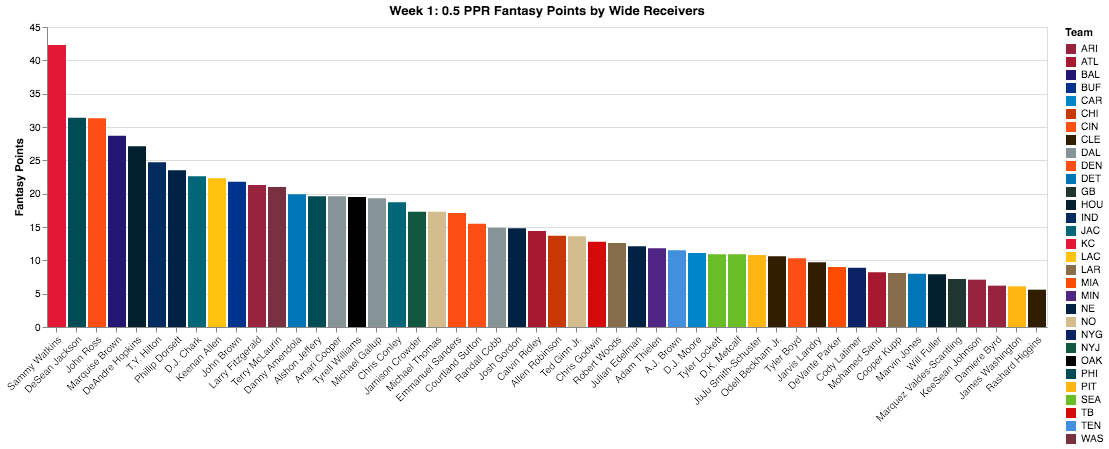

In [45]:
chart

In [46]:
chart.save(PATH + 'plots/WR_fantasypoints_color.png', scale_factor=3.0)

In [47]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'FantasyPoints:Q',
        axis = alt.Axis(title = 'Fantasy Points')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'FantasyPoints',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: 0.5 PPR Fantasy Points by Wide Receivers')

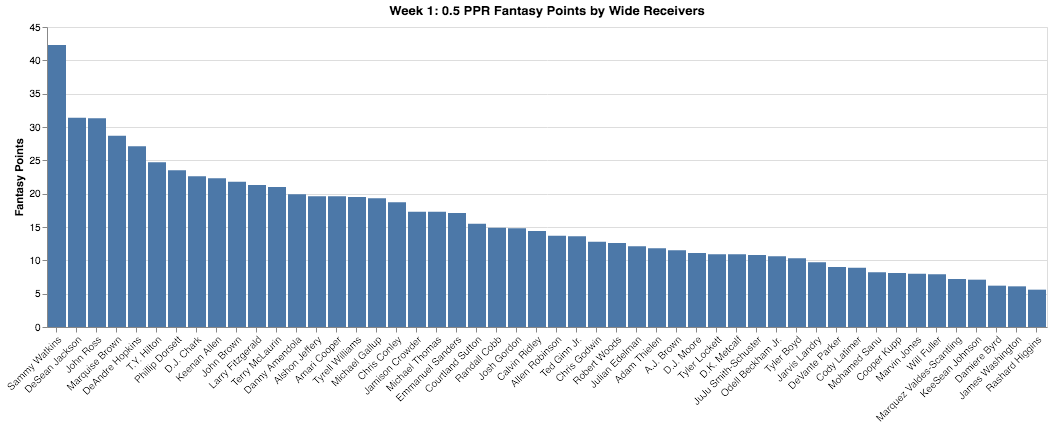

In [48]:
chart

In [49]:
chart.save(PATH + 'plots/WR_fantasypoints_plain.png', scale_factor=3.0)

## Receiving Yards

In [50]:
data = df[['Player', 'Team', 'ReceivingYards']].copy()

In [51]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'ReceivingYards:Q',
        axis = alt.Axis(title = 'Receiving Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'ReceivingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Receiving Yards by Wide Receivers (Top 50)')

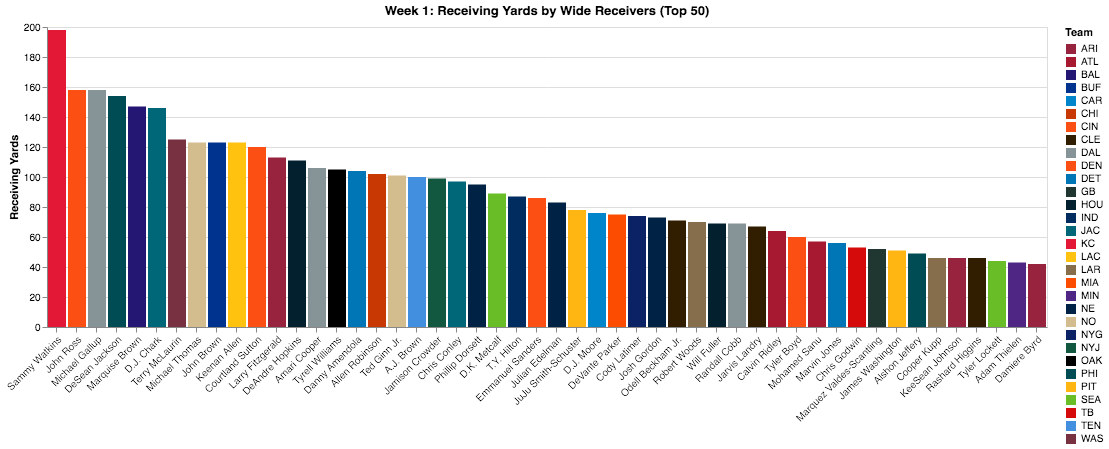

In [52]:
chart

In [53]:
chart.save(PATH + 'plots/WR_receivingyards_color.png', scale_factor=3.0)

In [54]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'ReceivingYards:Q',
        axis = alt.Axis(title = 'Receiving Yards')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'ReceivingYards',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Receiving Yards by Wide Receivers (Top 50)')

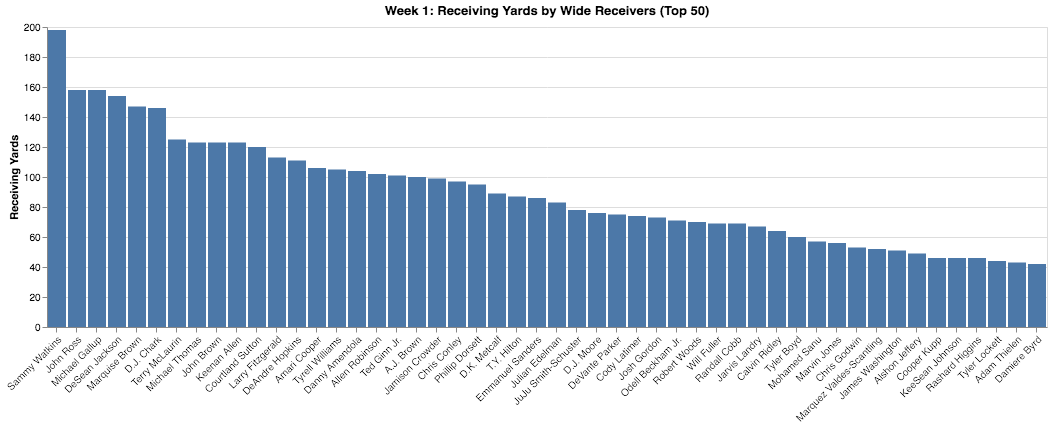

In [55]:
chart

In [56]:
chart.save(PATH + 'plots/WR_receivingyards_plain.png', scale_factor=3.0)

## Targets

In [88]:
data = df[['Player', 'Team', 'Targets']].copy()

In [89]:
extra = pd.DataFrame({
    'Player': ['James Washington', 'Dede Westbrook'],
    'Team': ['PIT', 'JAC'],
    'Targets': [6, 6]})
data = data.append(extra, ignore_index = True)

In [95]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Targets:Q',
        axis = alt.Axis(title = 'Targets')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Targets',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    ),
    color = alt.Color(
        'Team:N',
        scale = alt.Scale(
            domain = teams,
            range = color_codes        
        )
    )
).properties(title = 'Week 1: Targets for Wide Receivers')

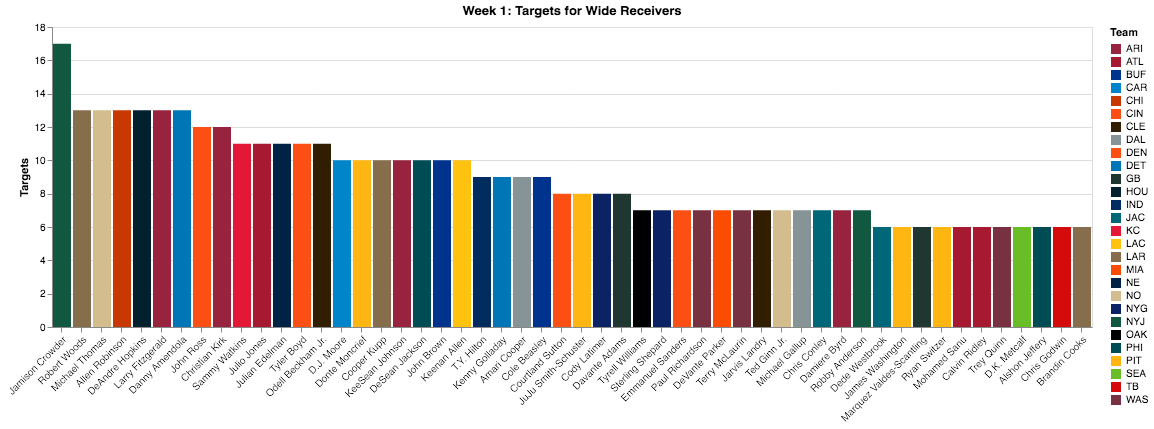

In [96]:
chart

In [97]:
chart.save(PATH + 'plots/WR_targets_color.png', scale_factor=3.0)

In [98]:
chart = alt.Chart(data).mark_bar().encode(
    alt.Y(
        'Targets:Q',
        axis = alt.Axis(title = 'Targets')
    ),
    alt.X(
        'Player:N',
        sort = alt.EncodingSortField(
            field = 'Targets',
            op = 'sum',
            order = 'descending'
          ),
        axis = alt.Axis(title = '', labelAngle = -45)
    )
).properties(title = 'Week 1: Targets for Wide Receivers')

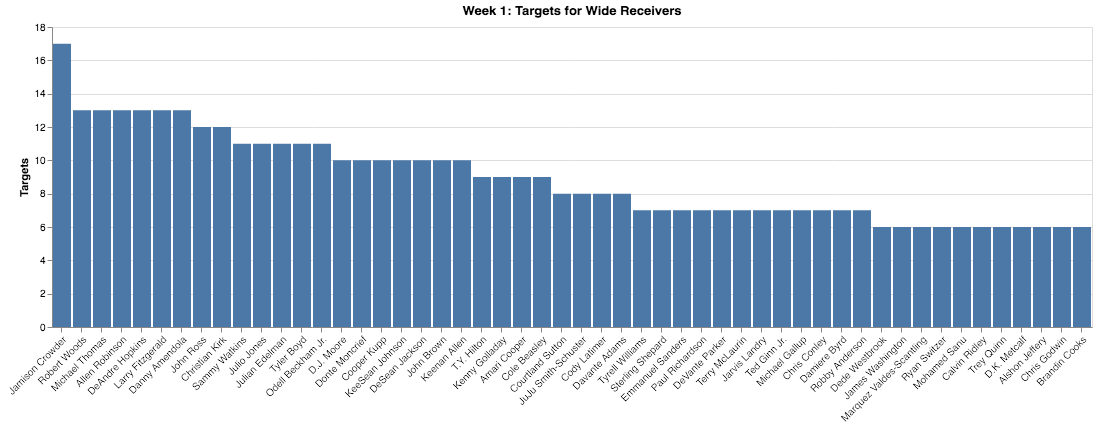

In [99]:
chart

In [100]:
chart.save(PATH + 'plots/WR_targets_plain.png', scale_factor=3.0)

## Receptions

In [ ]:
data = df[['Player', 'Team', 'Receptions']].copy()

In [ ]:
 51. Paul Richardson	WAS	1	7	4	36	0	0	0	0	5.6	5.6
 52. Calvin Ridley	ATL	1	6	4	64	1	0	0	0	14.4	14.4
 53. Marquez Valdes-Scantling	GB	1	6	4	52	0	1	0	0	7.2	7.2

## Yards Per Catch